### Consommation annuelle d'électricité et de gaz par région

* Permet de visualiser l’évolution de 2011 à 2023 des consommations d'électricité et de gaz par secteur d'activité, par catégorie de consommation, par code NAF et par région.*

* Ces données sont publiées dans le respect des règles relatives à la protection des Informations Commercialement Sensibles.*

* Une notice méthodologique est disponible en PJ*

### Importation des packages

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

### Importation de la Base

In [78]:
## importation de la base
df_cons = pd.read_csv("consommation-annuelle-d-electricite-et-gaz-par-region.csv", sep = ";", usecols = ["OPERATEUR", "FILIERE"
                    ,"Année", "Code Région", "Nom Région", "CODE CATEGORIE CONSOMMATION", "CODE GRAND SECTEUR"
                    ,"CODE SECTEUR NAF2", "Nb sites", "Conso totale (MWh)", "Conso moyenne (MWh)"])

In [79]:
df_cons.head(10)

,OPERATEUR,FILIERE,Année,Code Région,Nom Région,CODE CATEGORIE CONSOMMATION,CODE GRAND SECTEUR,CODE SECTEUR NAF2,Nb sites,Conso totale (MWh),Conso moyenne (MWh)
0,SAEML Hunelec,Electricité,2022,44,Grand Est,ENT,INCONNU,NaN,3.0,9755.398,3251.799333
1,SAEML Hunelec,Electricité,2022,44,Grand Est,ENT,INDUSTRIE,10.0,2.0,147.201,73.600500
2,SAEML Hunelec,Electricité,2022,44,Grand Est,ENT,INDUSTRIE,21.0,3.0,6676.029,2225.343000
3,SAEML Hunelec,Electricité,2022,44,Grand Est,ENT,TERTIAIRE,36.0,1.0,27.582,27.582000
4,SAEML Hunelec,Electricité,2022,44,Grand Est,ENT,TERTIAIRE,45.0,2.0,206.832,103.416000
5,SAEML Hunelec,Electricité,2022,44,Grand Est,ENT,TERTIAIRE,52.0,4.0,375.323,93.830750
6,SAEML Hunelec,Electricité,2022,44,Grand Est,ENT,TERTIAIRE,70.0,1.0,25.003,25.003000
7,SAEML Hunelec,Electricité,2022,44,Grand Est,ENT,TERTIAIRE,84.0,10.0,783.399,78.339900
8,SAEML Hunelec,Electricité,2022,44,Grand Est,ENT,TERTIAIRE,85.0,1.0,113.057,113.057000
9,SAEML Hunelec,Electricité,2022,44,Grand Est,ENT,TERTIAIRE,88.0,1.0,71.653,71.653000


## EDA

In [80]:
## les cinq dernières lignes
df_cons.tail(5)

,OPERATEUR,FILIERE,Année,Code Région,Nom Région,CODE CATEGORIE CONSOMMATION,CODE GRAND SECTEUR,CODE SECTEUR NAF2,Nb sites,Conso totale (MWh),Conso moyenne (MWh)
27592,Régies municipales électriques de Capvern,Electricité,2011,76,Occitanie,ENT,AGRICULTURE,NaN,10.0,1.00,0.0
27593,RME et de télédistribution de Clouange,Electricité,2011,44,Grand Est,ENT,TERTIAIRE,NaN,19.0,4217.00,221.0
27594,RME et de télédistribution de Clouange,Electricité,2011,44,Grand Est,RES,RESIDENTIEL,NaN,2576.0,8855.00,3.0
27595,Vialis,Electricité,2011,44,Grand Est,ENT,AGRICULTURE,NaN,31.0,529.02,17.0
27596,Vialis,Electricité,2011,44,Grand Est,RES,RESIDENTIEL,NaN,36053.0,112102.00,3.0


In [81]:
## consulter les dimension du dataframe
df_c = df_cons.shape[0]
df_l = df_cons.shape[1]
print("Le nombre de lignes de notre DataFrame est : {}".format(df_c))
print(f"Le nombre de colonnes de  notre DataFrame est : {df_l}")

Le nombre de lignes de notre DataFrame est : 27597
Le nombre de colonnes de  notre DataFrame est : 11


In [82]:
## les noms de nos colonnes
df_cons.columns

Index(['OPERATEUR', 'FILIERE', 'Année', 'Code Région', 'Nom Région',
       'CODE CATEGORIE CONSOMMATION', 'CODE GRAND SECTEUR',
       'CODE SECTEUR NAF2', 'Nb sites', 'Conso totale (MWh)',
       'Conso moyenne (MWh)'],
      dtype='object')

In [83]:
## les types de variables
df_cons.dtypes

OPERATEUR                       object
FILIERE                         object
Année                            int64
Code Région                      int64
Nom Région                      object
CODE CATEGORIE CONSOMMATION     object
CODE GRAND SECTEUR              object
CODE SECTEUR NAF2              float64
Nb sites                       float64
Conso totale (MWh)             float64
Conso moyenne (MWh)            float64
dtype: object

In [84]:
## obtenir plus d'info sur les variables de notre DataFrame
df_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27597 entries, 0 to 27596
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   OPERATEUR                    27597 non-null  object 
 1   FILIERE                      27597 non-null  object 
 2   Année                        27597 non-null  int64  
 3   Code Région                  27597 non-null  int64  
 4   Nom Région                   27597 non-null  object 
 5   CODE CATEGORIE CONSOMMATION  27597 non-null  object 
 6   CODE GRAND SECTEUR           27597 non-null  object 
 7   CODE SECTEUR NAF2            19071 non-null  float64
 8   Nb sites                     27060 non-null  float64
 9   Conso totale (MWh)           27060 non-null  float64
 10  Conso moyenne (MWh)          27369 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.3+ MB


In [85]:
## les années présentes dans notre DataFrame
df_cons['Année'].unique()

array([2022, 2023, 2021, 2019, 2020, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011], dtype=int64)

In [86]:
## les opérateurs présents dans la base
df_cons["OPERATEUR"].unique()

array(['SAEML Hunelec', 'SAIC Pers Loisinges', 'SEM Beauvois Distrelec',
       'SICAE ELY', 'SICAE Est', 'SICAE Oise', 'SICAE de Carnin',
       'SICAE de Precy-Saint-Martin', "SICAE de l'Aisne",
       'SICAE de la Somme et du Cambraisis',
       'SICAE de la vallée du Sausseron',
       'SICAE des cantons de la Ferté-Alais et limitrophes',
       'SICAE du Carmausin', 'SICAP', 'SOREA', 'SRD', 'Sorégies',
       'Strasbourg Électricité Réseaux',
       "Syndicat d'électricité synergie Maurienne",
       'Syndicat des Energies Electriques de Tarentaise',
       "Syndicat intercommunal d'électricité de Labergement Saint Marie",
       'Synelva', 'Séolis', 'Teréga', 'Trois Frontières Distribution Gaz',
       'Téréga', 'URM (Metz)', "Usines municipales d'Erstein",
       'Veolia eau', 'Vialis', 'Vialis SAEM', 'Caléo',
       'Energie et services de Seyssel', 'Energis', 'Gaz de Barr',
       'Gaz électricité de Grenoble', 'Gazelec de Péronne', 'Gedia',
       'GRDF', 'Groupement Elise - 

In [87]:
## les catégories de consommation
df_cons["CODE CATEGORIE CONSOMMATION"].unique()

array(['ENT', 'PRO', 'RES', 'ENT_PRO'], dtype=object)

In [88]:
## les secteurs d'activités
df_cons['CODE GRAND SECTEUR'].unique()

array(['INCONNU', 'INDUSTRIE', 'TERTIAIRE', 'RESIDENTIEL', 'AGRICULTURE'],
      dtype=object)

In [89]:
## les filières
df_cons['FILIERE'].unique()

array(['Electricité', 'Gaz'], dtype=object)

In [90]:
## renommer les colonnes suivantes:
df_cons = df_cons.rename(columns = {'Nom Région' : 'Région', 'CODE CATEGORIE CONSOMMATION':'CATEGORIE CONSOMMATION'
                      ,'CODE GRAND SECTEUR': 'GRAND SECTEUR'})

In [91]:
df_cons.head(2)

,OPERATEUR,FILIERE,Année,Code Région,Région,CATEGORIE CONSOMMATION,GRAND SECTEUR,CODE SECTEUR NAF2,Nb sites,Conso totale (MWh),Conso moyenne (MWh)
0,SAEML Hunelec,Electricité,2022,44,Grand Est,ENT,INCONNU,NaN,3.0,9755.398,3251.799333
1,SAEML Hunelec,Electricité,2022,44,Grand Est,ENT,INDUSTRIE,10.0,2.0,147.201,73.600500


In [92]:
### Les valeurs uniques pour chaque variable
df_cons.nunique()

OPERATEUR                   193
FILIERE                       2
Année                        13
Code Région                  18
Région                       18
CATEGORIE CONSOMMATION        4
GRAND SECTEUR                 5
CODE SECTEUR NAF2            88
Nb sites                   3898
Conso totale (MWh)        25004
Conso moyenne (MWh)       23348
dtype: int64

* Nous pouvons consater que nous avons:
- 193 **opérateurs (fournisseurs) présents**
- 18 **Régions**
- 5 **Grands secteurs**
* Les catégorie de consommation sont réparties en 4

### Nettoyage et Préparation des données

* Gestion des données manquantes

In [93]:
## nous allons créer une fonction nous permettant de compter le nombre de valeur manquantes pour chaque variable
def val_manquante_compte(col):
    manquante = pd.isnull(col)
    null = col[manquante]
    return len(null)

In [94]:
col_null_compte = df_cons.apply(val_manquante_compte)
print(col_null_compte)

OPERATEUR                    0
FILIERE                      0
Année                        0
Code Région                  0
Région                       0
CATEGORIE CONSOMMATION       0
GRAND SECTEUR                0
CODE SECTEUR NAF2         8526
Nb sites                   537
Conso totale (MWh)         537
Conso moyenne (MWh)        228
dtype: int64


* Nous allons nous focaliser sur les variables qui nous intéresse à savoir:
* la consommation totale (MWh) 
* la consommation moyenne (MWh)

**Nous allons procéder au traitement des valeurs manquantes par la moyenne de chaque variable** 
Mais avant cela analysons en profondeur les valeurs manquantes

<AxesSubplot:>

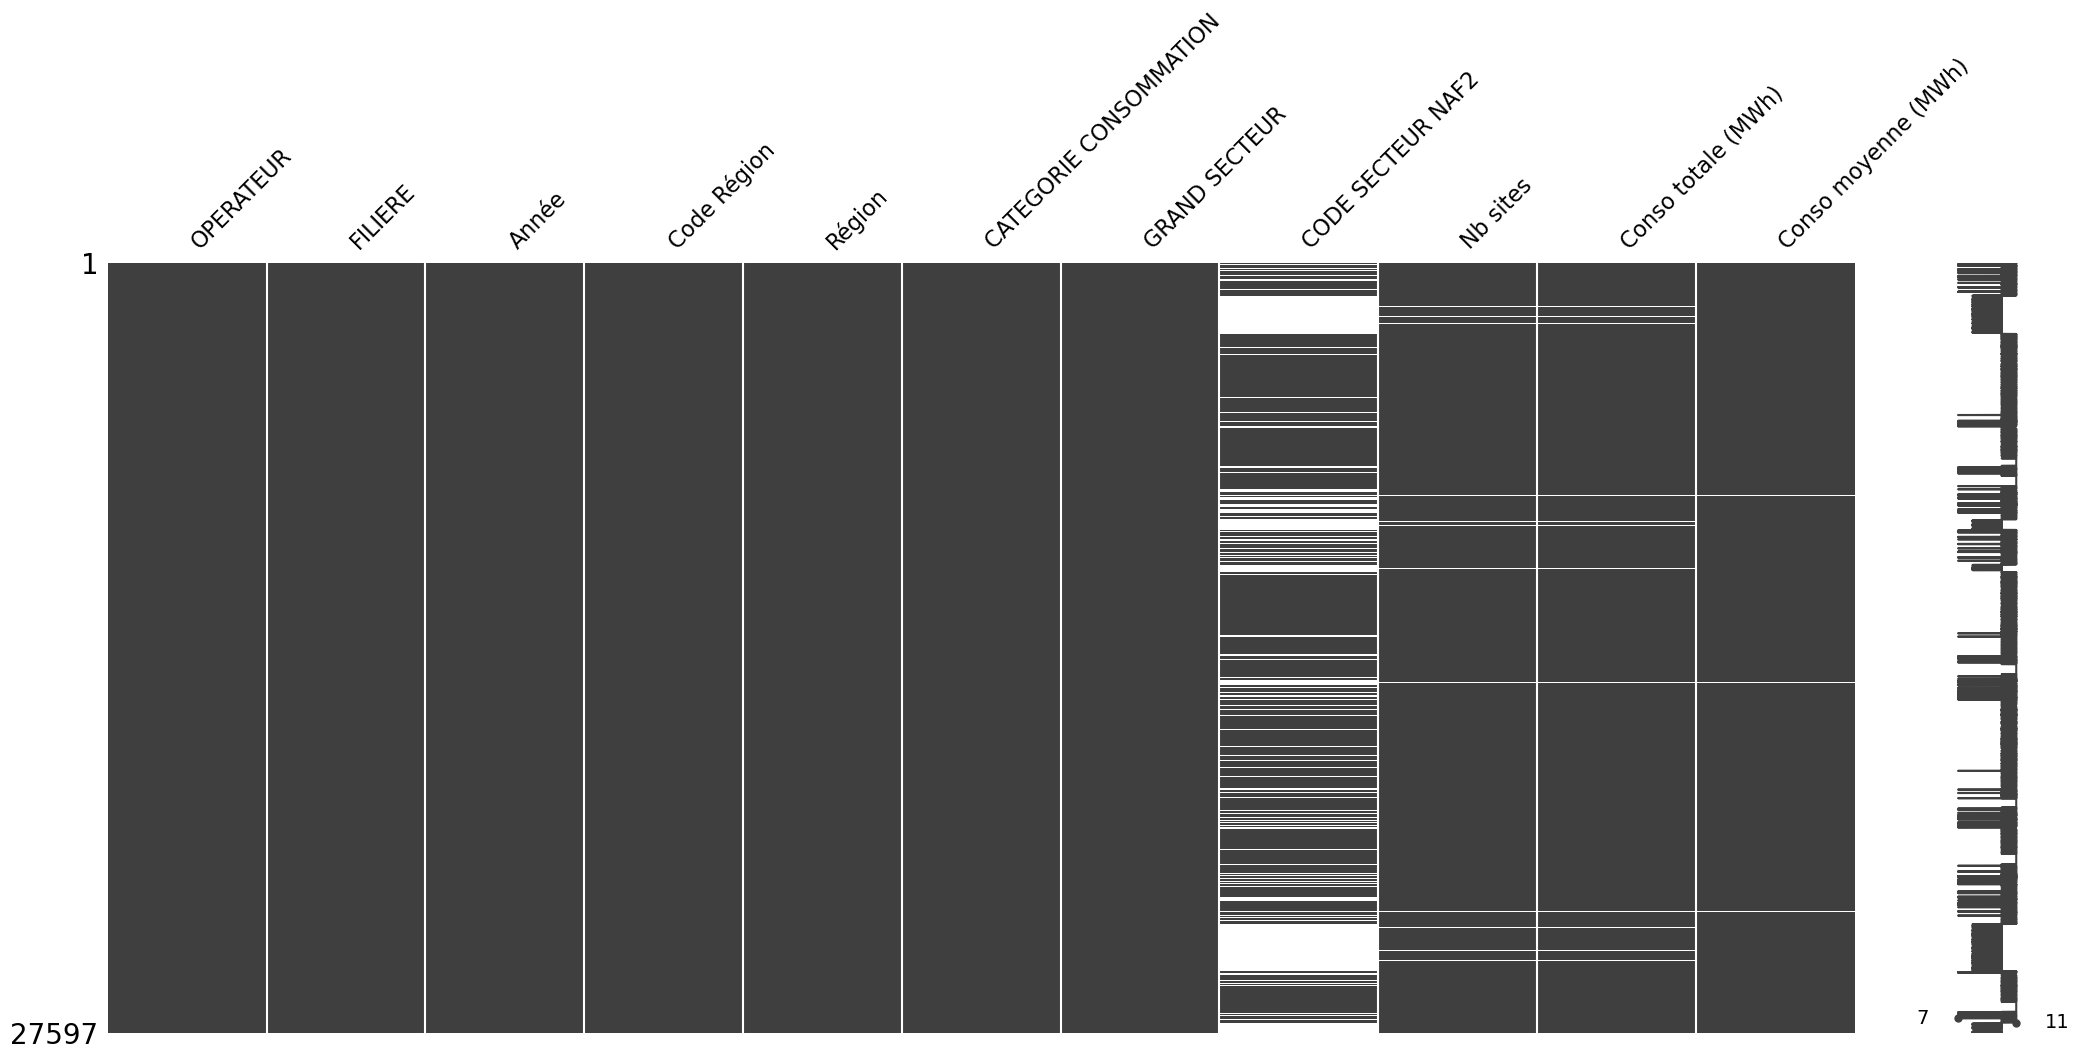

In [95]:
msno.matrix(df_cons)

In [96]:
subset_1 = df_cons[df_cons["Conso totale (MWh)"].isnull()]

In [97]:
subset_1['Région'].value_counts()

Région
Auvergne-Rhône-Alpes          160
Occitanie                     105
Grand Est                      75
Hauts-de-France                64
Nouvelle-Aquitaine             32
Pays de la Loire               18
Centre-Val de Loire            18
Île-de-France                  16
Bourgogne-Franche-Comté        12
Bretagne                        8
Provence-Alpes-Côte d'Azur      7
Normandie                       6
Guyane                          3
La Réunion                      3
Corse                           3
Guadeloupe                      3
Martinique                      3
Mayotte                         1
Name: count, dtype: int64

In [98]:
subset_2 = df_cons[df_cons['Conso moyenne (MWh)'].isnull()]
subset_2["Région"].value_counts()

Région
Occitanie                     67
Auvergne-Rhône-Alpes          35
Grand Est                     30
Nouvelle-Aquitaine            17
Centre-Val de Loire           16
Pays de la Loire              15
Hauts-de-France               14
Bourgogne-Franche-Comté       10
Provence-Alpes-Côte d'Azur     7
Île-de-France                  7
Normandie                      6
Bretagne                       4
Name: count, dtype: int64

**Nous constatons que les régions Occitanie et Auvergne-Rhône-Alpes** sont les régions où on note plus de valeurs manquantes sur 
les variables **Conso Totale (MWh)** et **Conso moyenne (MWh)**

- Calcul des moyennes pour les variables **conso totale (MWh)** et **Conso moyenne (MWh)**
- Et remplaçons les valeurs manquantes par la moyenne

In [99]:
col_names = ["Conso totale (MWh)", "Conso moyenne (MWh)", "Nb sites"]

for valu_not_null in col_names:
    valu_not_null = pd.isnull(df_cons[col_names])
    bonne_val = df_cons[col_names][valu_not_null == False]
    mean_bonne_val = bonne_val.mean()
    df_cons.fillna(mean_bonne_val, inplace = True)

**Vérification**

In [100]:
df_cons.isnull().sum()

OPERATEUR                    0
FILIERE                      0
Année                        0
Code Région                  0
Région                       0
CATEGORIE CONSOMMATION       0
GRAND SECTEUR                0
CODE SECTEUR NAF2         8526
Nb sites                     0
Conso totale (MWh)           0
Conso moyenne (MWh)          0
dtype: int64

- Gestion des valeurs dupliquées

In [101]:
df_cons[df_cons.duplicated()]

,OPERATEUR,FILIERE,Année,Code Région,Région,CATEGORIE CONSOMMATION,GRAND SECTEUR,CODE SECTEUR NAF2,Nb sites,Conso totale (MWh),Conso moyenne (MWh)


**Apparemment aucune valeurs n'est dupliquées**

- Néanmoins comptons le nombre de lignes pour s'assurer qu'on trouvera 0

In [102]:
df_cons.duplicated().sum()

0

- Nous pouvons conclure q'il n'y a pas de valeurs dupliquées

## - Description des variables

In [103]:
## les variables quanti
df_cons.describe()

,Année,Code Région,CODE SECTEUR NAF2,Nb sites,Conso totale (MWh),Conso moyenne (MWh)
count,27597.000000,27597.000000,19071.000000,2.759700e+04,2.759700e+04,2.759700e+04
mean,2019.999601,51.354314,48.533008,2.398509e+04,4.152738e+05,1.052091e+04
std,2.757121,27.023214,27.435637,2.483521e+05,2.127379e+06,9.283918e+04
min,2011.000000,1.000000,1.000000,1.000000e+00,0.000000e+00,0.000000e+00
25%,2019.000000,28.000000,24.000000,4.000000e+00,1.024515e+03,5.530700e+01
50%,2021.000000,44.000000,46.000000,2.700000e+01,1.027100e+04,2.068350e+02
75%,2022.000000,76.000000,72.000000,2.490000e+02,9.269200e+04,8.495971e+02
max,2023.000000,94.000000,99.000000,6.415139e+06,4.788899e+07,8.385241e+06


In [104]:
## les variables quali
df_cons.describe(include = 'object')

,OPERATEUR,FILIERE,Région,CATEGORIE CONSOMMATION,GRAND SECTEUR
count,27597,27597,27597,27597,27597
unique,193,2,18,4,5
top,Enedis,Electricité,Grand Est,ENT,TERTIAIRE
freq,6934,20725,4780,22743,12932


## ANALYSE GRAPHIQUE DE LA CONSOMMATION D'ELECTRICITE ET DE GAZ

- **ANALYSE PAR FILIERE**

Text(0, 0.5, 'Consommation Moyenne (MWh)')

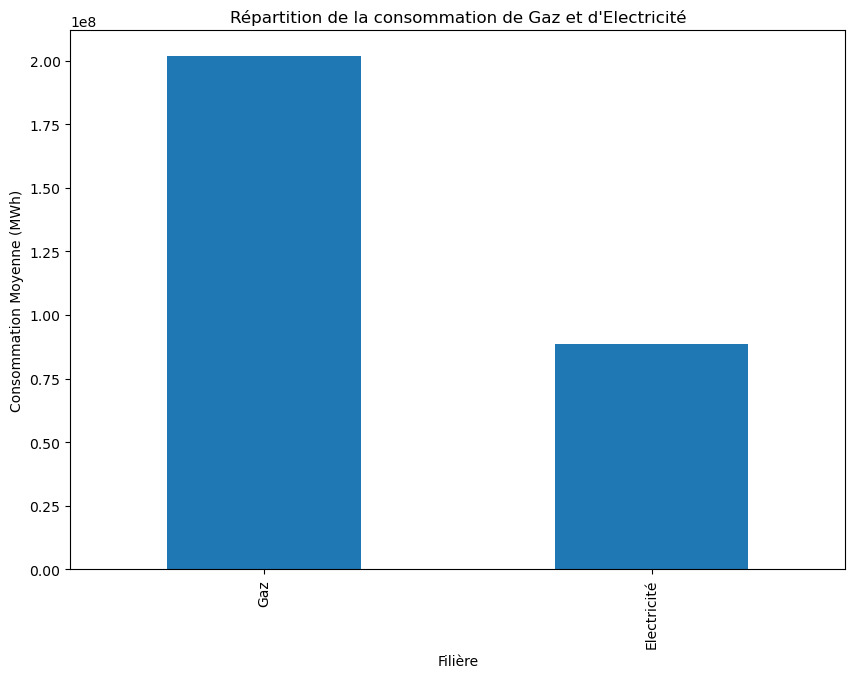

In [105]:
plt.figure(figsize = (10,7))
df_cons.groupby('FILIERE')['Conso moyenne (MWh)'].sum().sort_values(ascending = False).plot(kind = "bar")
plt.title('Répartition de la consommation de Gaz et d\'Electricité')
plt.xlabel('Filière')
plt.ylabel('Consommation Moyenne (MWh)')

* Le Gaz est plus consommé que l'électricité, cela peut s'expliquer par le fait de la transition énergétique entamé surtout vers le Gaz naturel

- **ANALYSE PAR SECTEUR D'ACTIVITE**

Text(0, 0.5, 'Consommation Moyenne')

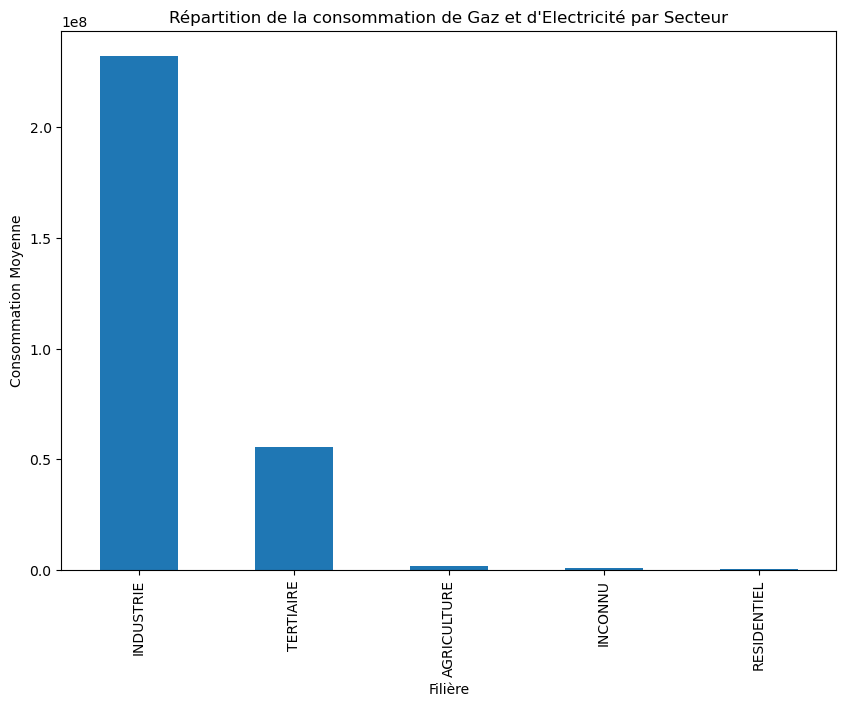

In [106]:
plt.figure(figsize = (10,7))
df_cons.groupby('GRAND SECTEUR')['Conso moyenne (MWh)'].sum().sort_values(ascending = False).plot(kind = "bar")
plt.title('Répartition de la consommation de Gaz et d\'Electricité par Secteur')
plt.xlabel('Filière')
plt.ylabel('Consommation Moyenne')

- **ANALYSE PAR CATEGORIE DE CONSOMMATION**

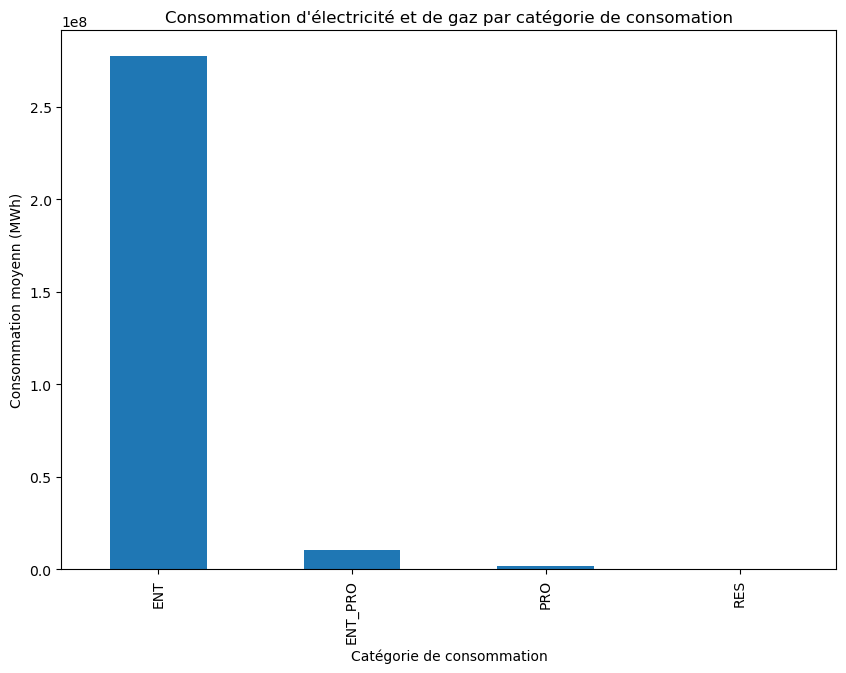

In [107]:
plt.figure(figsize = (10,7))

df_categorie = df_cons.groupby("CATEGORIE CONSOMMATION")["Conso moyenne (MWh)"].sum()
df_categorie.plot(kind = "bar")

plt.title("Consommation d'électricité et de gaz par catégorie de consomation")
plt.xlabel("Catégorie de consommation")
plt.ylabel("Consommation moyenn (MWh)")
plt.show()

- **TOP 10 DES FOURNISSEURS D'ELECTRICITE ET DE GAZ PAR CONSOMMATION MOYENNE (MWh)**

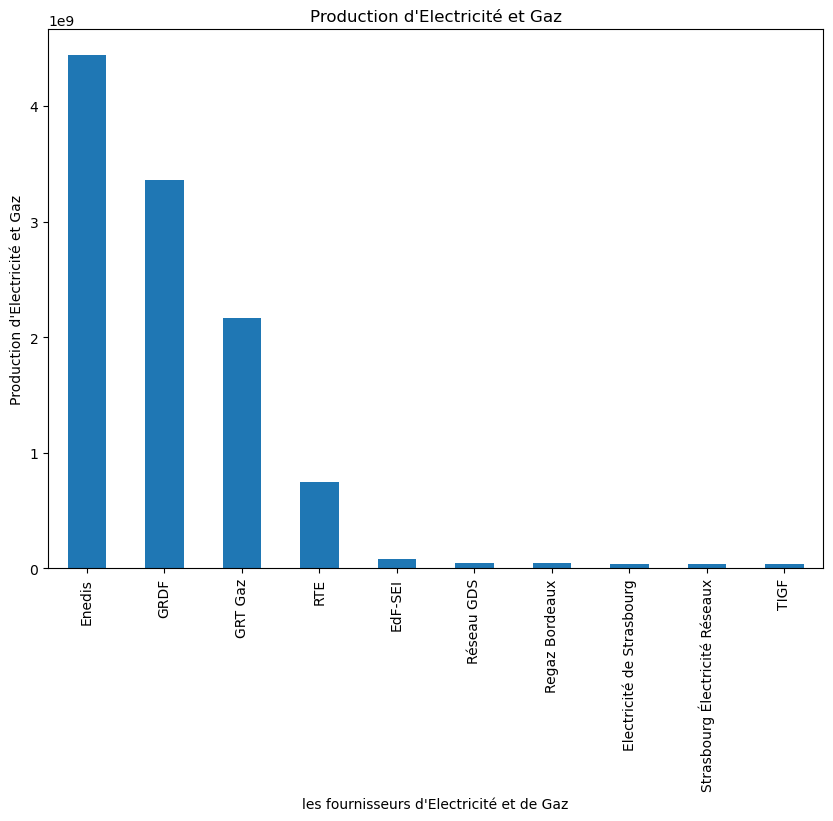

In [108]:
plt.figure(figsize = (10,7))
top_10_op = df_cons.groupby('OPERATEUR')['Conso totale (MWh)'].sum().sort_values(ascending = False).head(10)
top_10_op.plot(kind = "bar")
plt.title('Production d\'Electricité et Gaz')
plt.xlabel('les fournisseurs d\'Electricité et de Gaz')
plt.ylabel('Production d\'Electricité et Gaz')
plt.show()

#### Les Opérateurs qui fournissent du Gaz ou de l'électricité

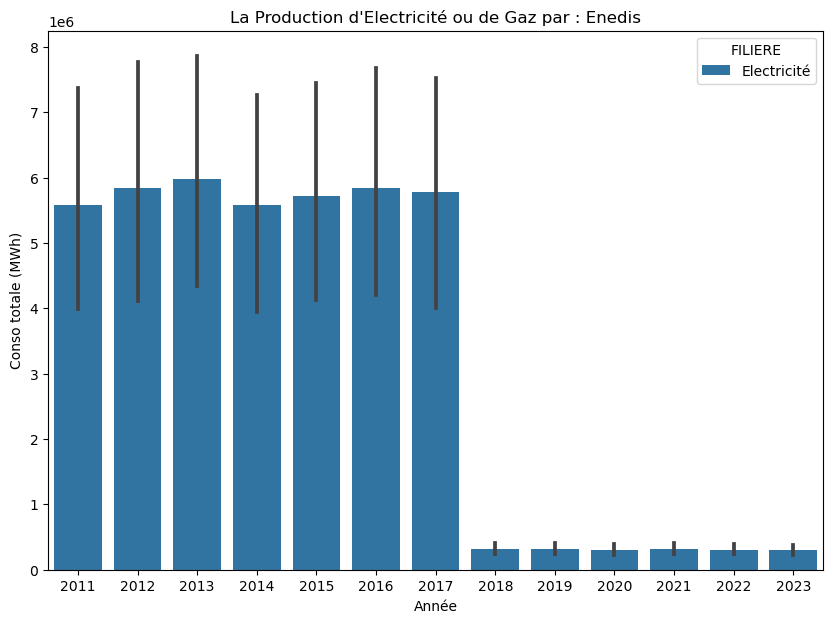

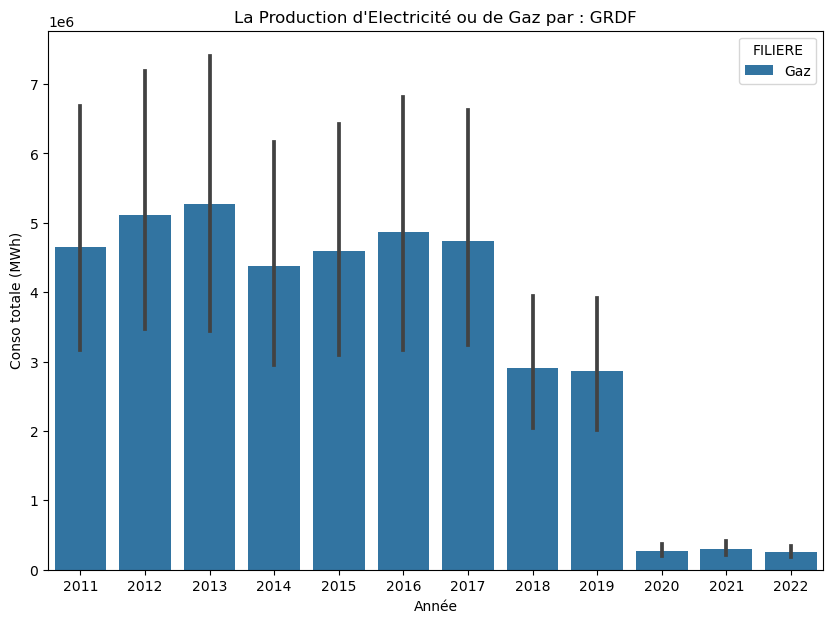

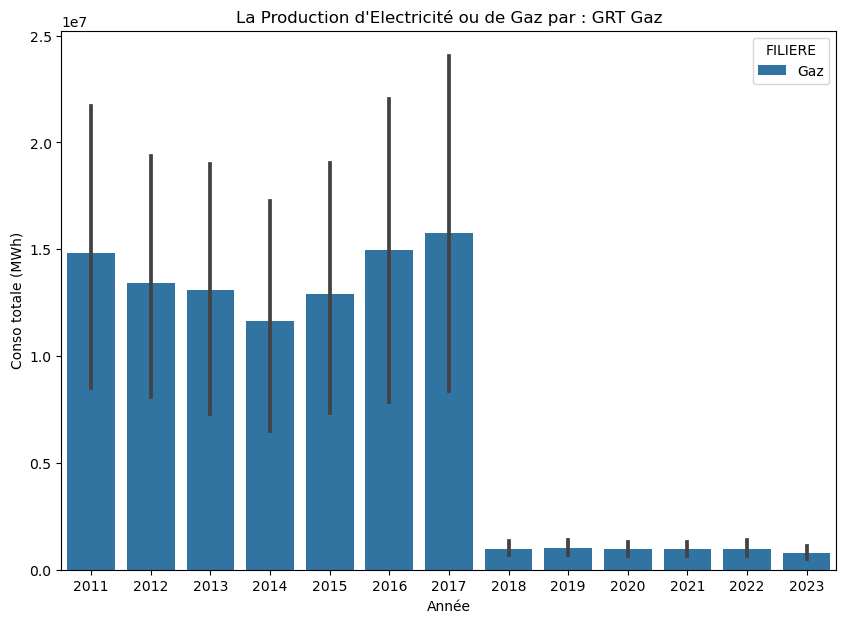

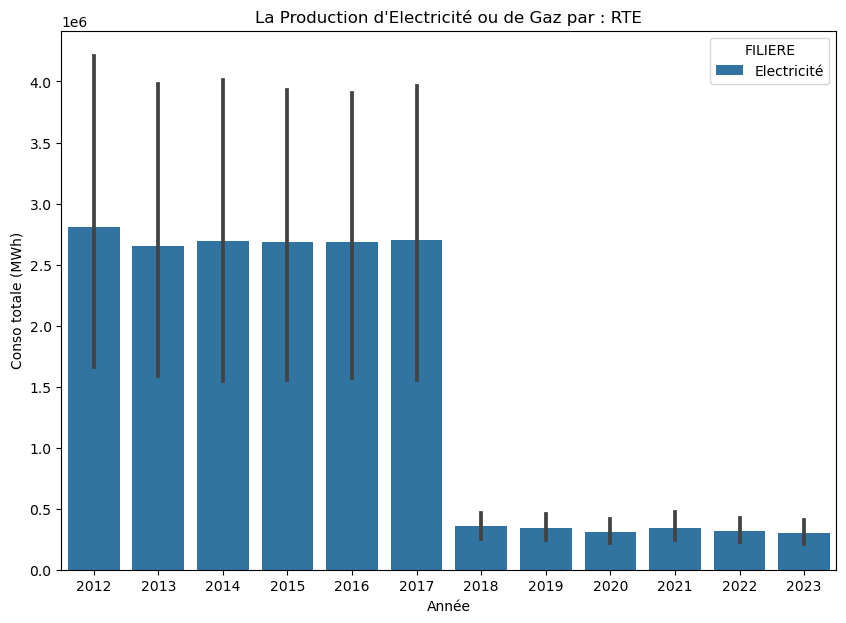

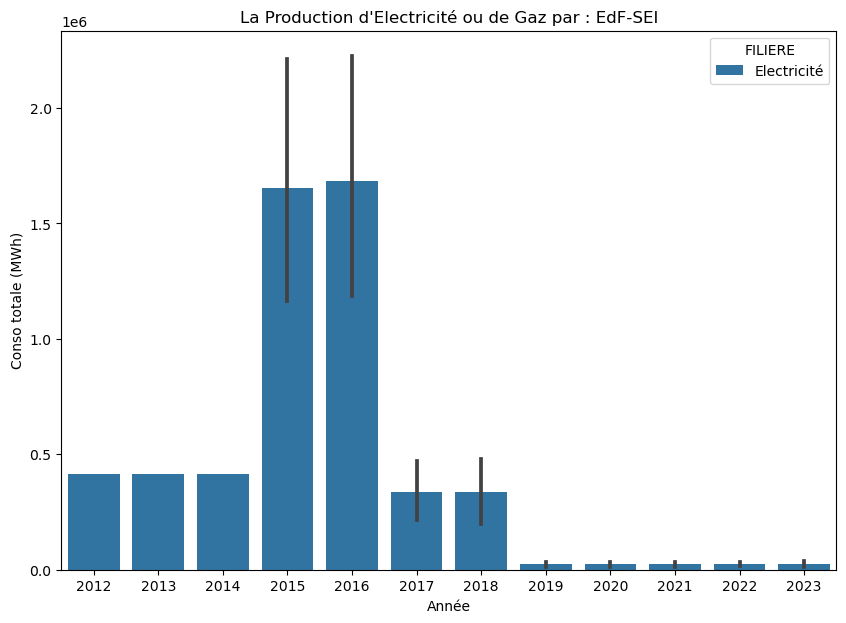

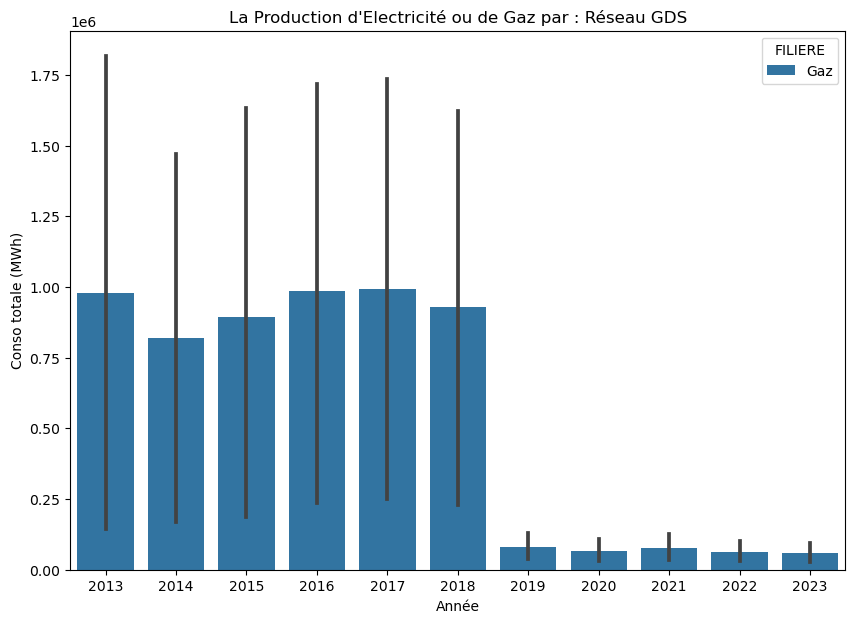

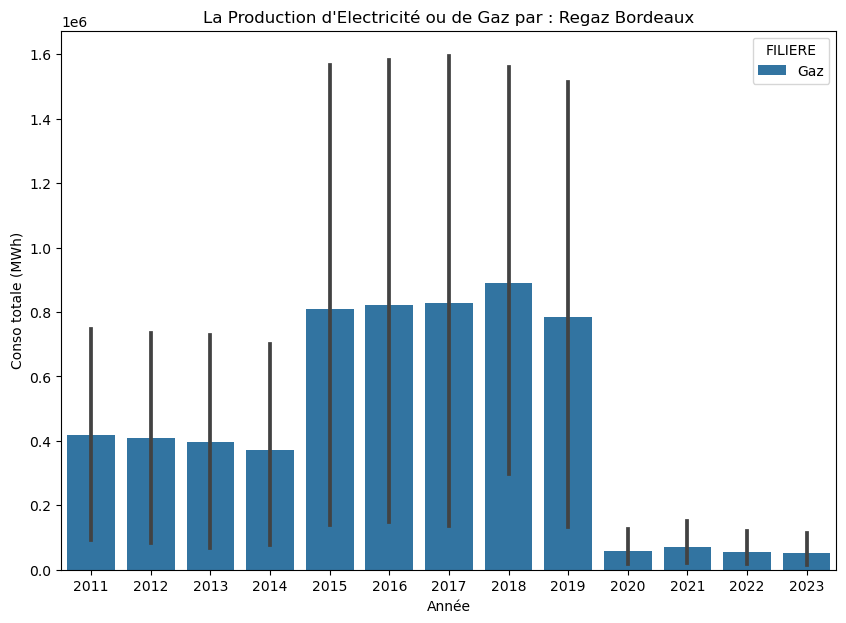

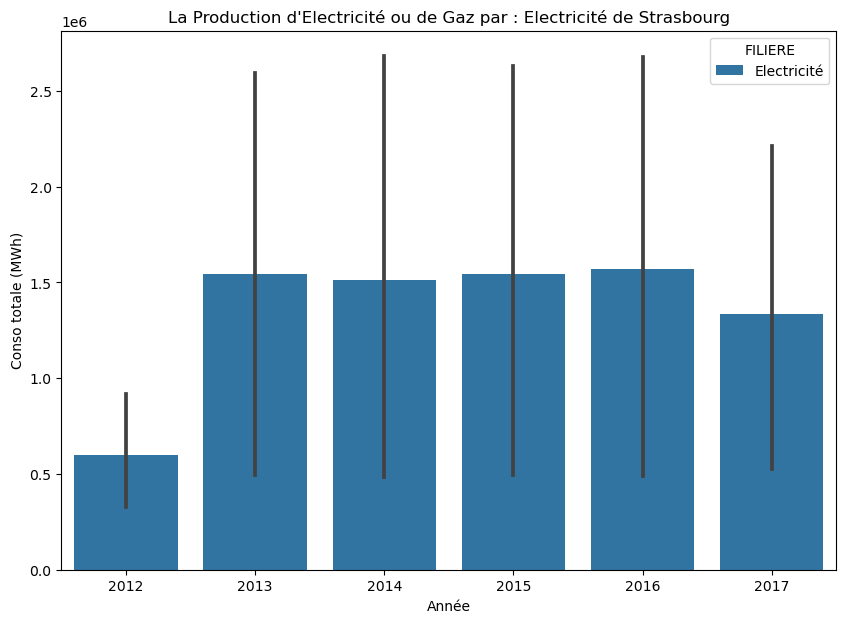

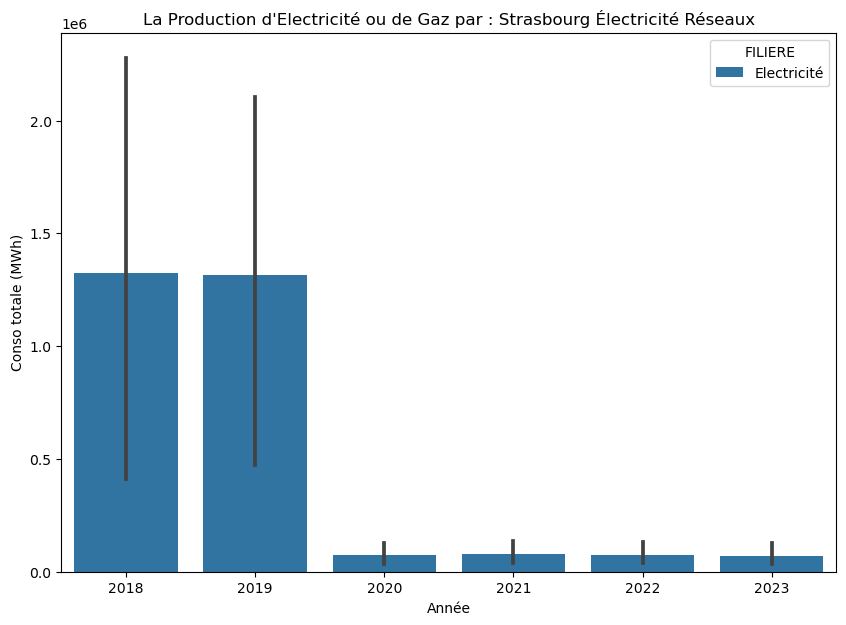

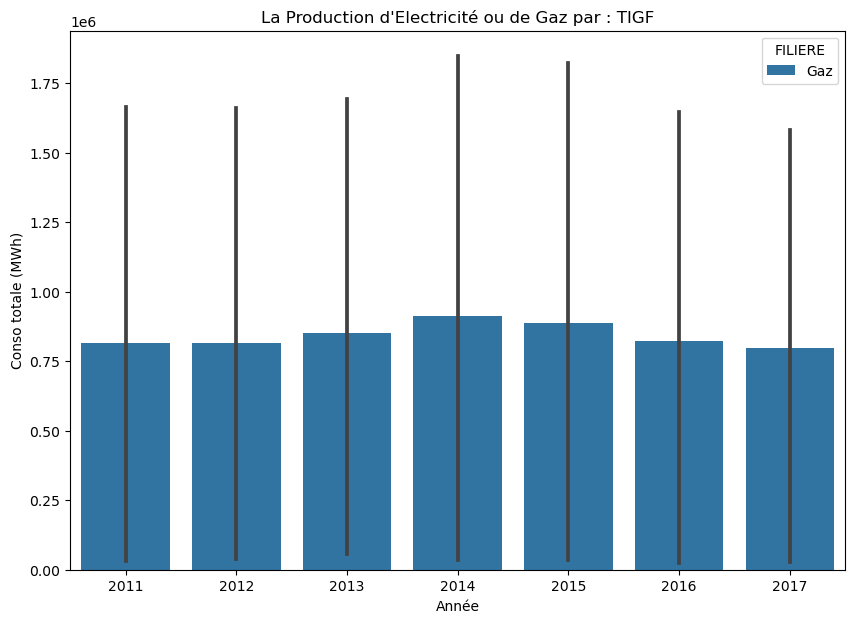

In [122]:
cols = ["Enedis", "GRDF", "GRT Gaz", "RTE", "EdF-SEI", "Réseau GDS", "Regaz Bordeaux", "Electricité de Strasbourg"
      ,"Strasbourg Électricité Réseaux", "TIGF"]

top_10 = df_cons[df_cons['OPERATEUR'].isin(cols)]




for col in cols:
    df_col = top_10[top_10["OPERATEUR"] == col]
    
    plt.figure(figsize = (10,7))
    sns.barplot(x = "Année",
           y = "Conso totale (MWh)",
           hue = "FILIERE",
           data = df_col)
    plt.title(f"La Production d'Electricité ou de Gaz par : {col}")
    plt.show()

- La Qauntité produite par Opérateur

In [130]:
def production(df):
    filiere = top_10['OPERATEUR'].unique()
    counts_dictionary = dict()
    
    for c in filiere:
        df_prod = top_10[top_10["OPERATEUR"] == c]
        total = df_prod["Conso totale (MWh)"].sum()
        counts_dictionary[c] = total
    return counts_dictionary

In [131]:
prod_ope = dict()
prod_ope = production(df)
print(prod_ope)

{'Strasbourg Électricité Réseaux': 38683007.0, 'GRDF': 3357606906.85179, 'GRT Gaz': 2167217844.4722853, 'Regaz Bordeaux': 43427038.506068714, 'Réseau GDS': 49634561.410000004, 'TIGF': 35397916.760000005, 'EdF-SEI': 82019875.71951537, 'Electricité de Strasbourg': 40542618.24034357, 'Enedis': 4438527355.760084, 'RTE': 744470053.564451}


## La Consommation d'électricité et de Gaz par Région

In [132]:
df_cons.groupby('Région')['Conso totale (MWh)'].sum().sort_values(ascending = False)

Région
Île-de-France                 1.746871e+09
Auvergne-Rhône-Alpes          1.476207e+09
Hauts-de-France               1.429509e+09
Grand Est                     1.395747e+09
Provence-Alpes-Côte d'Azur    9.355176e+08
Normandie                     8.645422e+08
Nouvelle-Aquitaine            8.218783e+08
Occitanie                     7.410587e+08
Pays de la Loire              5.899137e+08
Bourgogne-Franche-Comté       4.883466e+08
Bretagne                      4.689235e+08
Centre-Val de Loire           4.164077e+08
La Réunion                    2.601480e+07
Corse                         1.903353e+07
Guadeloupe                    1.458850e+07
Martinique                    1.374276e+07
Guyane                        8.636972e+06
Mayotte                       3.373193e+06
Name: Conso totale (MWh), dtype: float64

Text(0, 0.5, 'Conso Totale (MWh)')

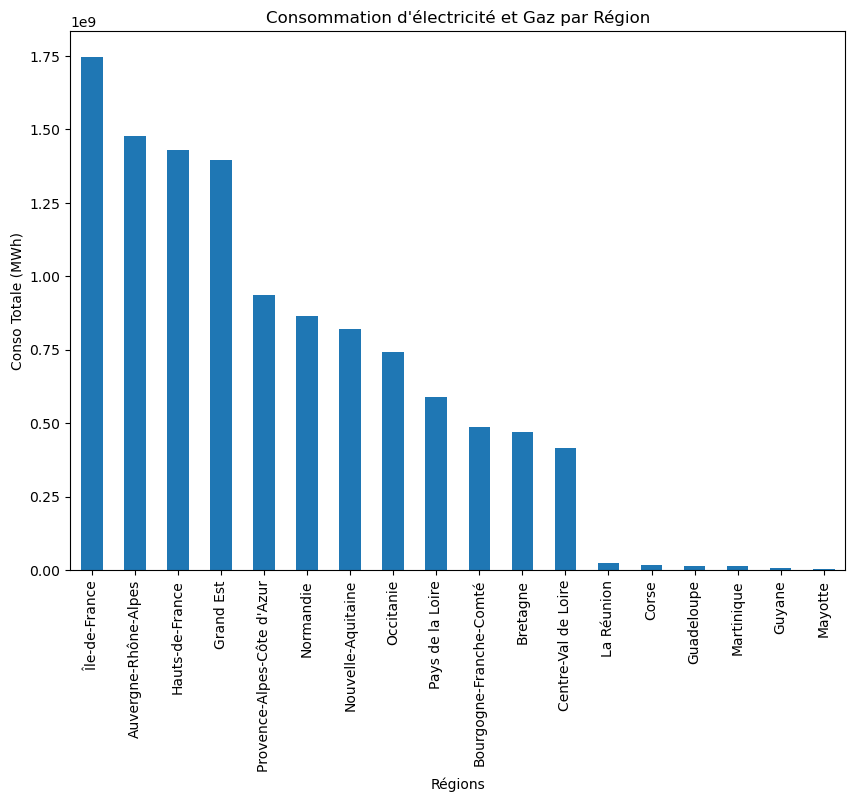

In [133]:
plt.figure(figsize = (10,7))
df_cons.groupby('Région')['Conso totale (MWh)'].sum().sort_values(ascending = False).plot(kind = "bar")

plt.title("Consommation d\'électricité et Gaz par Région")
plt.xlabel('Régions')
plt.ylabel('Conso Totale (MWh)')

## Récupérons les cinq (05) Régions où la consommation d'électricté est la plus élevée ces 13 dernières années (2011 to 2023).

In [134]:
top_5 = df_cons.groupby("Région")["Conso totale (MWh)"].sum().sort_values(ascending = False).head(5)

print(f"Les régions suivantes sont les plus consommatrices d'électricité durant les 13 dernières années :\n {top_5}")

Les régions suivantes sont les plus consommatrices d'électricité durant les 13 dernières années :
 Région
Île-de-France                 1.746871e+09
Auvergne-Rhône-Alpes          1.476207e+09
Hauts-de-France               1.429509e+09
Grand Est                     1.395747e+09
Provence-Alpes-Côte d'Azur    9.355176e+08
Name: Conso totale (MWh), dtype: float64


In [135]:
top_5 = df_cons.groupby("Région")["Conso totale (MWh)"].mean().sort_values(ascending = False).head(5)

print(f"la consommation moyenne des régions: \n {top_5}")

la consommation moyenne des régions: 
 Région
Île-de-France                 1.216484e+06
Normandie                     7.283422e+05
Provence-Alpes-Côte d'Azur    7.190758e+05
Hauts-de-France               6.442133e+05
Pays de la Loire              5.234372e+05
Name: Conso totale (MWh), dtype: float64


### Analyse détaillée de la consommation d'électricité et de Gaz dans le top 5

- **LA REGION ÎLE-DE-FRANCE**

In [136]:
conso_ile_de_france = df_cons[df_cons['Région'] == 'Île-de-France']

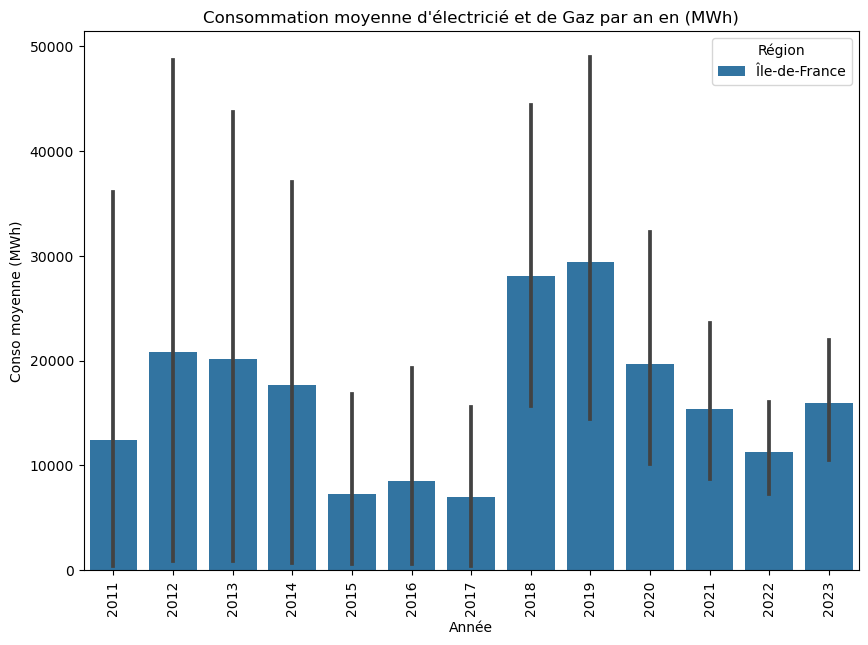

In [137]:
plt.figure(figsize = (10,7))

sns.barplot(x = 'Année',
            y = 'Conso moyenne (MWh)',
            hue = 'Région',
            data = conso_ile_de_france)
plt.xticks(rotation = 90)
plt.title("Consommation moyenne d'électricié et de Gaz par an en (MWh)")
plt.show()

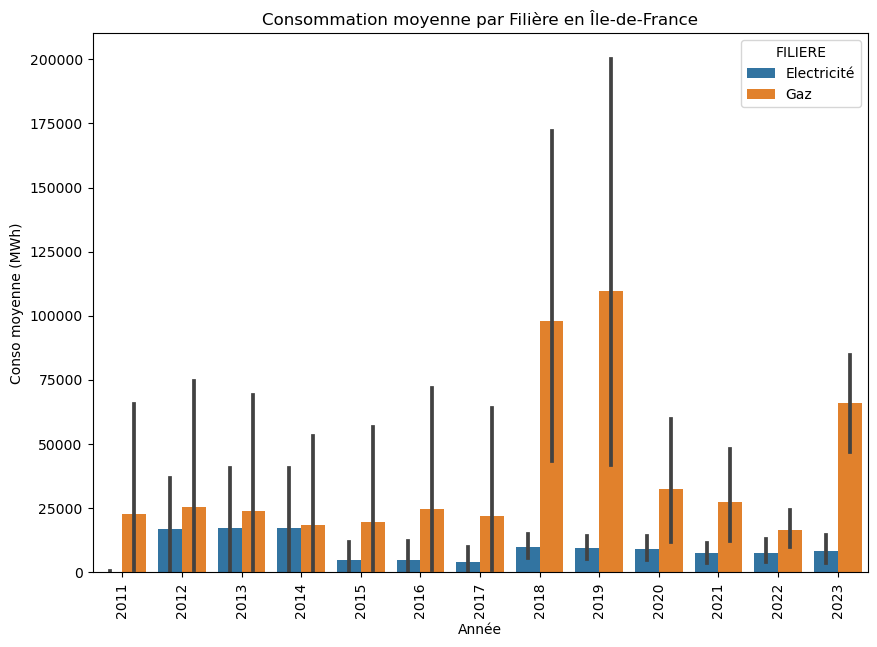

In [138]:
plt.figure(figsize = (10,7))

sns.barplot(x = 'Année',
            y = 'Conso moyenne (MWh)',
            hue = 'FILIERE',
            data = conso_ile_de_france)
plt.xticks(rotation = 90)
plt.title('Consommation moyenne par Filière en Île-de-France')
plt.show()

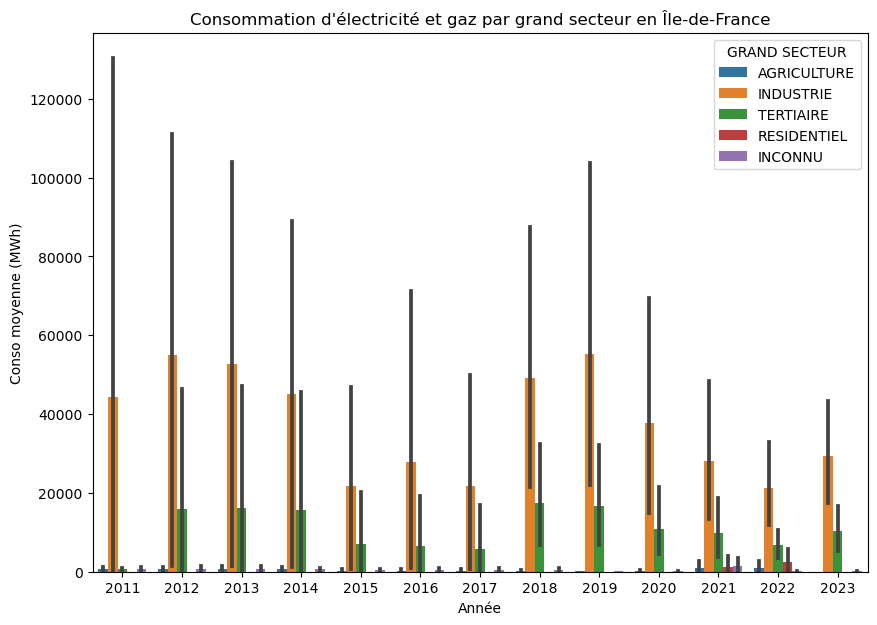

In [139]:
plt.figure(figsize = (10,7))

sns.barplot(x = "Année",
            y = "Conso moyenne (MWh)",
            hue = "GRAND SECTEUR",
            data = conso_ile_de_france)
plt.title('Consommation d\'électricité et gaz par grand secteur en Île-de-France')
plt.show()

- Le Tertiaire et L'industrie dominent largement la consommation d'électricité et de gaz en Île-de-France entre 2011 et 2023

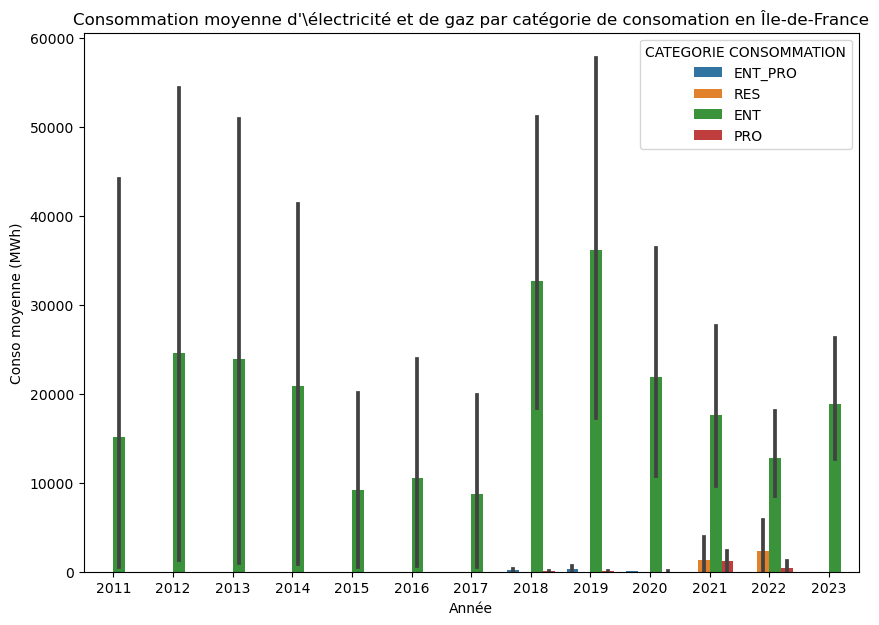

In [140]:
plt.figure(figsize = (10,7))

sns.barplot(x = "Année",
            y = "Conso moyenne (MWh)",
            hue = "CATEGORIE CONSOMMATION",
           data = conso_ile_de_france)
plt.title("Consommation moyenne d'\électricité et de gaz par catégorie de consomation en Île-de-France")
plt.show()

- **LA REGION DU GRAND EST**

In [141]:
conso_auvergne_rhône_alpes = df_cons[df_cons["Région"] == "Auvergne-Rhône-Alpes"]

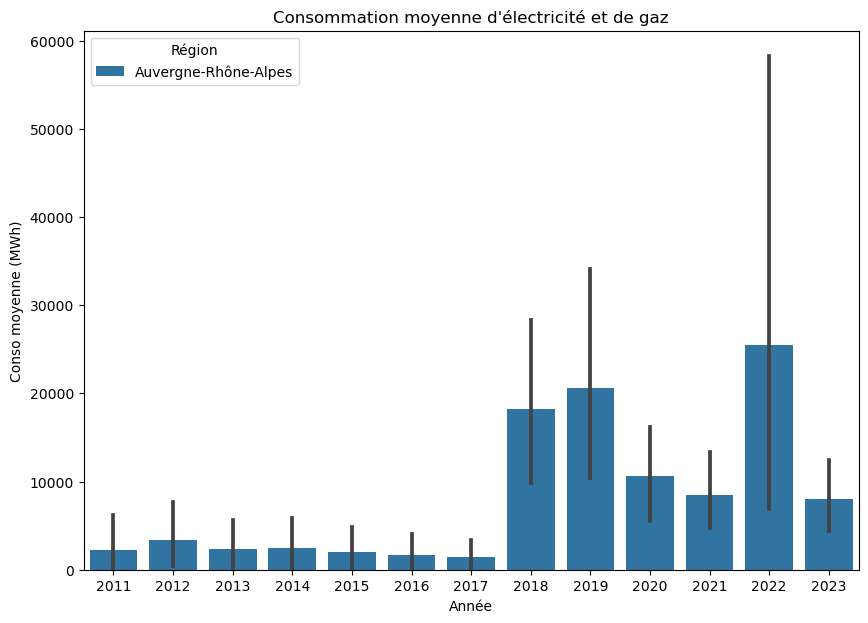

In [142]:
plt.figure(figsize = (10,7))

sns.barplot(x = "Année",
            y = "Conso moyenne (MWh)",
            hue = "Région",
            data = conso_auvergne_rhône_alpes)
plt.title("Consommation moyenne d'électricité et de gaz")
plt.show()

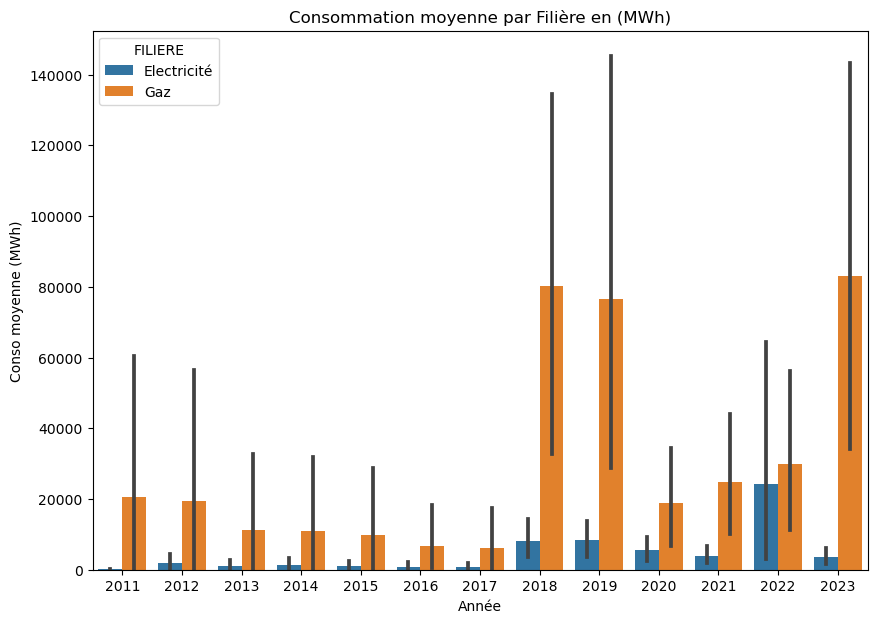

In [143]:
plt.figure(figsize = (10,7))

sns.barplot(x = "Année",
            y = "Conso moyenne (MWh)",
            hue = "FILIERE",
            data = conso_auvergne_rhône_alpes)
plt.title("Consommation moyenne par Filière en (MWh)")
plt.show()

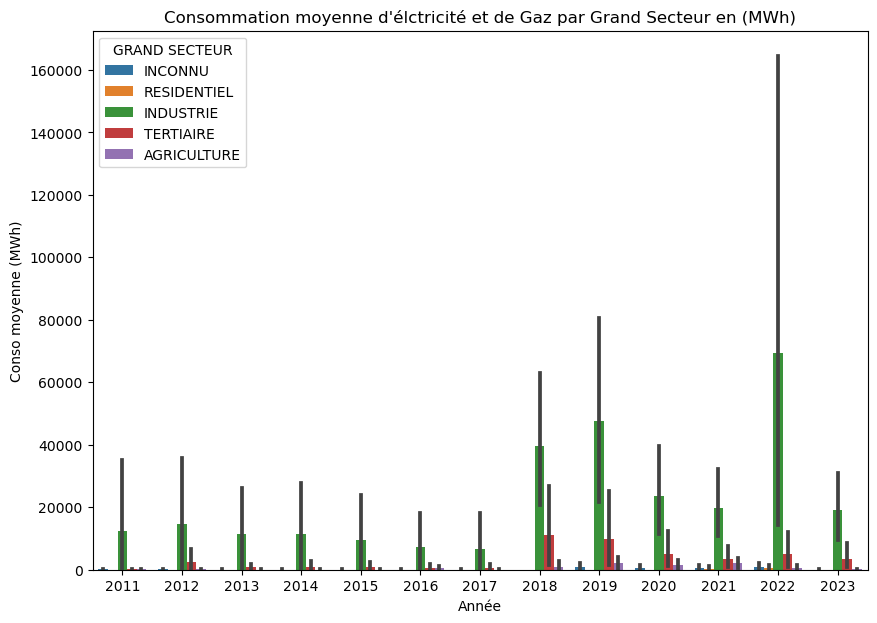

In [144]:
plt.figure(figsize = (10,7))

sns.barplot(x = "Année",
            y = "Conso moyenne (MWh)",
            hue = "GRAND SECTEUR",
            data = conso_auvergne_rhône_alpes)
plt.title("Consommation moyenne d'élctricité et de Gaz par Grand Secteur en (MWh)")
plt.show()

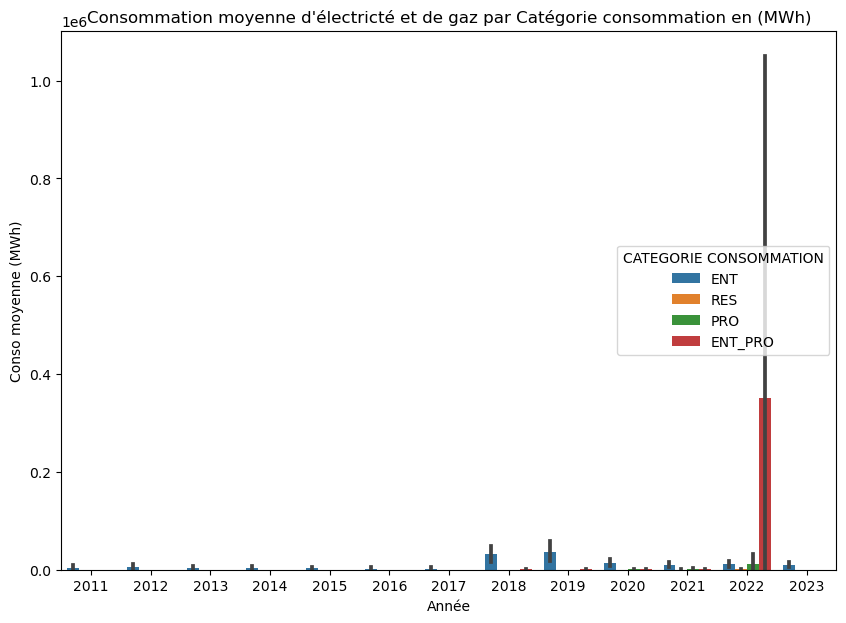

In [145]:
plt.figure(figsize = (10,7))

sns.barplot(x = "Année",
            y = "Conso moyenne (MWh)",
            hue = "CATEGORIE CONSOMMATION",
            data = conso_auvergne_rhône_alpes)
plt.title("Consommation moyenne d'électricté et de gaz par Catégorie consommation en (MWh)")
plt.show()

- **LA REGION DES HAUTS-DE-FRANCE**

In [146]:
Conso_haut_de_france = df_cons[df_cons['Région'] == "Hauts-de-France"]

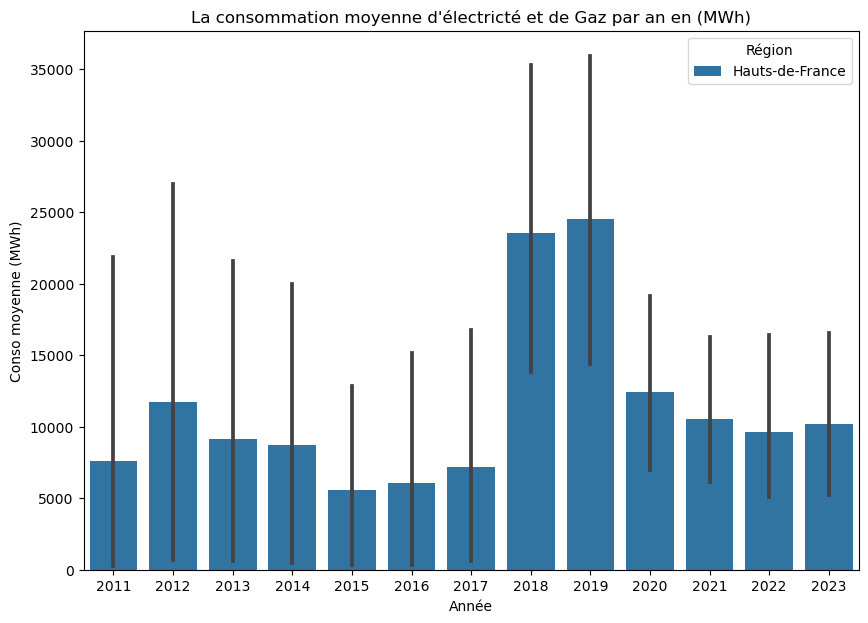

In [150]:
plt.figure(figsize = (10,7))

sns.barplot(x = "Année",
            y = "Conso moyenne (MWh)",
            hue = "Région",
            data = Conso_haut_de_france)
plt.title('La consommation moyenne d\'électricté et de Gaz par an en (MWh)')
plt.show()

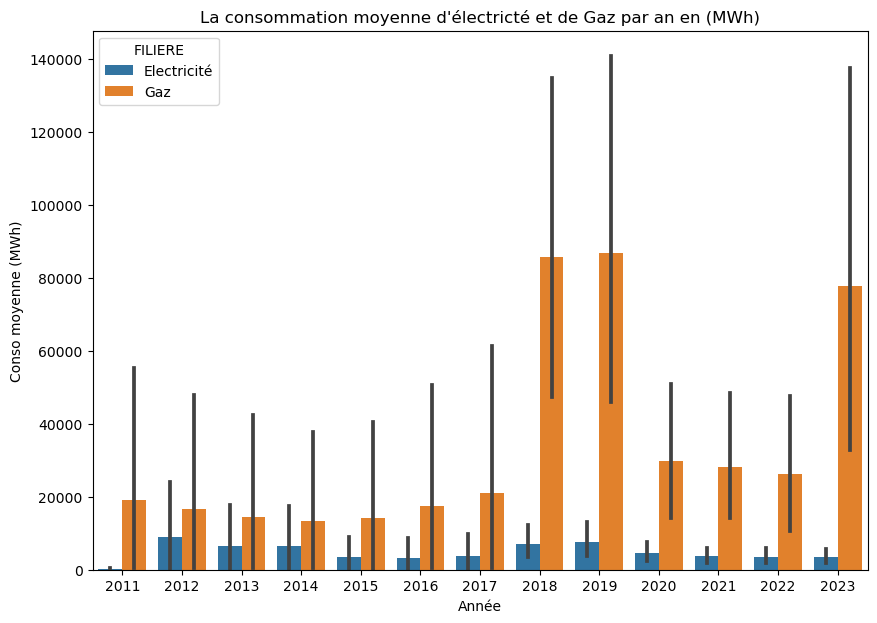

In [151]:
plt.figure(figsize = (10,7))

sns.barplot(x = "Année",
            y = "Conso moyenne (MWh)",
            hue = "FILIERE",
            data = Conso_haut_de_france)
plt.title('La consommation moyenne d\'électricté et de Gaz par an en (MWh)')
plt.show()

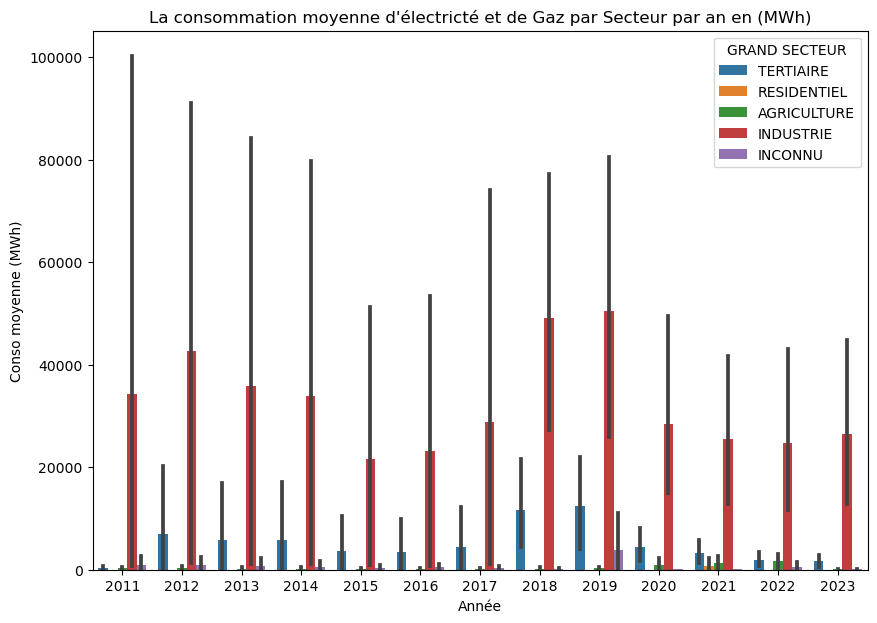

In [152]:
plt.figure(figsize = (10,7))

sns.barplot(x = "Année",
            y = "Conso moyenne (MWh)",
            hue = "GRAND SECTEUR",
            data = Conso_haut_de_france)
plt.title('La consommation moyenne d\'électricté et de Gaz par Secteur par an en (MWh)')
plt.show()

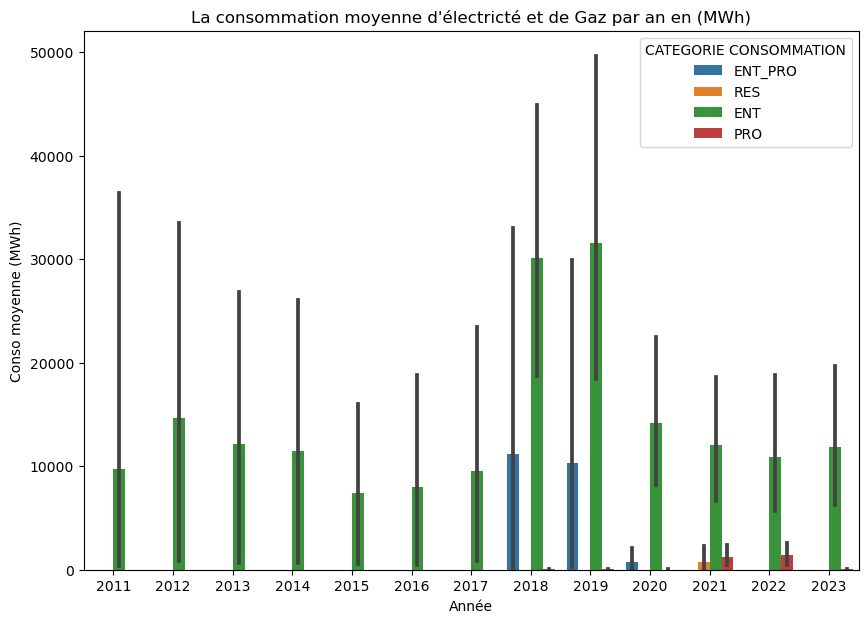

In [153]:
plt.figure(figsize = (10,7))

sns.barplot(x = "Année",
            y = "Conso moyenne (MWh)",
            hue = "CATEGORIE CONSOMMATION",
            data = Conso_haut_de_france)
plt.title('La consommation moyenne d\'électricté et de Gaz par an en (MWh)')
plt.show()